<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/9_ML_Titanic_RegLog_KNN_RF_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aplicación de Machine Learning en el caso Titanic: Regresión Logística, KNN, Random Forest y SVC

El reto

El hundimiento del Titanic es uno de los naufragios más conocidos de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que supuso la muerte de 1502 de los 2224 pasajeros y de la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

##Referencias

https://www.kaggle.com/c/titanic

https://www.kaggle.com/showeed/starter-book-begginer-analysis/notebook

# Importar librerías

In [ ]:
import pandas as pd

#Obtener los datos
Descargamos el fichero en local y lo subimos a Google Colab

https://www.kaggle.com/c/titanic/data?select=train.csv

In [ ]:
#train_data = pd.read_csv("train.csv")
train_data = pd.read_csv("sample_data/train.csv")


Examinamos los datos cargados

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Información de los campos o features ("características")

"PassengerId" es el número de pasajero

"Survived" indica si el pasajero sobrevivió (valor 1) o no sobrevivió (valor 0) al naufragio

"Pclass" es la clase: primera clase, segunda clase y tercera clase 

"Name" es el nombre del pasajero

"Sex" es el sexo del pasajero: male (masculino) o female (femenino)

"Age" es la edad del pasajero

"SibSp" es la abreviatura de "Siblings and Spouses" que se traduce como "Hermanos y Esposas" que se embarcaron con el pasajero

"Parch" es la abreviatura de "Parents and children", esto es, el número de padres / hijos que se embarcaron con el pasajero

"Ticket" es el código del billete

"Fare" es la tarifa o precio del billete

"Cabin" es el camarote del pasajero

"Embarked" es la inicial del puerto donde embarcó el pasajero: C = Cherbourg; Q = Queenstown; S = Southampton


Examinamos el contenido del DataFrame: 
- Datos no nulos
- Tipos de datos


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos ver que hay valores nulos en algunos campos o variables.

También vemos que hay campos con valores no numéricos como Name, Sex, Ticket, Cabin y Embarked

##¿Qué hacer con los valores nulos?

Veamos cuántos valores nulos hay:

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Aquí podemos ver el número de valores que faltan en cada columna. Esos valores que faltan pueden causar un problema cuando los necesitemos

Tenemos varias opciones

- Eliminar todos los registros que tienen algún valor nulo -> Perdemos información

- Prescindir de las variables o atributos de las que no tenemos valores en todos los registros -> Perdemos información

- Rellenar los valores nulos con valores, por ejemplo, la media del valor si es numérico o el valor más frecuente si no es numérico -> No perdemos información pero añadimos información estimativa (no real)

Si eliminamos todos los registros que no tienen valor en el campo edad

In [ ]:
train_data_2=train_data.dropna(subset=['Age'])

In [ ]:
train_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


El inconveniente es que perdemos la información de los registros incompletos y pueden ser muchos. 

Supongamos que eliminamos todos los registros incompletos...

In [ ]:
train_data_3=train_data.dropna()

In [ ]:
train_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Nos quedan solo 183 registros y hemos perdido mucha información!!!

Si rellenamos los valores nulos con el valor medio conservamos la información anterior aunque estamos introduciendo valores estimativos que puede distorsionar el original

Calculamos la media de edad de los pasajeros 

In [ ]:
edad_media = train_data['Age'].mean()
edad_media

29.69911764705882

Y rellenamos los registros sin edad con la edad media del resto de pasajeros

In [ ]:
train_data['Age']=train_data['Age'].fillna(edad_media)

Y así logramos tener una tabla de datos con menos valores nulos

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Para rellenar la edad podríamos ser más precisos si usamos datos estimados más elaborados como la media de edad de los pasajeros en función del género

In [ ]:
train_data.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

O la media de edad en función del género y de la clase

In [ ]:
train_data.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.141405
        2         28.748661
        3         24.068493
male    1         39.287717
        2         30.653908
        3         27.372153
Name: Age, dtype: float64

Del atributo Embarked hay solo dos valores nulos por lo que optamos por rellenar los nulos con el valor más frecuente o probable

In [ ]:
train_data.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [ ]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

Vamos a eliminar las varibles o atributos con muchos valores nulos: el atributo Cabin tiene 204 valores y 687 valores nulos (sin información)

In [ ]:
del train_data['Cabin']

Y este es el dataframe resultante sin valores nulos

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#¿Qué hacer con los atributos no numéricos?

Para que nuestras máquinas funcionen debemos alimentarlos con números por lo que debemos convertir los atributos no numéricos o por categorías en atributos numéricos

La función get_dummies() de Pandas convierte variables o atributos de categorías en varias variables numéricas con valores 0 y 1

In [ ]:
pd.get_dummies(train_data["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Estas columnas tienen información redundante por lo que podemos eliminar una columna porque no aporta información

In [ ]:
pd.get_dummies(train_data["Sex"],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Así creamos un atributo numérico a partir de un atributo no numérico o por categorías

In [ ]:
genero = pd.get_dummies(train_data["Sex"],drop_first=True)

Hacemos lo mismo con el resto de atributos no numéricos

In [ ]:
puerto = pd.get_dummies(train_data["Embarked"],drop_first=True)

In [ ]:
puerto

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


Añadimos estas columnas a nuestro DataFrame

In [ ]:
train_data = pd.concat([train_data,genero,puerto],axis=1)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  male         891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


Y eliminamos las columnas con datos por categorías

In [ ]:
train_data.drop(["PassengerId","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


Podemos ver las correlaciones entre todos los atributos porque ahora son todos numéricos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,-0.013855,-0.019336
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
S,-0.149683,0.074053,-0.019336,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


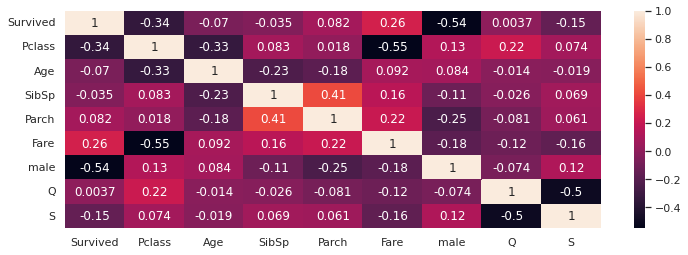

In [ ]:
fig,ax = plt.subplots(figsize=(12,4))
sns.heatmap(train_data.corr(), annot=True)

#Modelos de predicción con Machine Learning

## Modelo de Regresión Logística

El valor que queremos predecir es si el pasajero sobrevivió o no al naufragio por lo que solo hay dos resultados posibles. Tenemos por tanto un problema de Regresión Logística

Del dataset obtenemos los atributos y la variable a predecir

In [ ]:
X = train_data.drop("Survived",axis=1)
y = train_data["Survived"]

Para saber si nuestro modelo de predicción es bueno debemos reservar una parte de los datos para posteriormente contrastar los resultados predecidos con los reales

Usaremos train_test_split del módulo cross_validation para dividir nuestros datos. El 70% de los datos serán datos de entrenamiento y el 30% serán datos de prueba.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
rl.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print(rl.score(X_train, y_train))

0.8103932584269663


In [ ]:
print(rl.score(X_test, y_test))

0.7988826815642458


Comprobemos la precisión del modelo

En primer lugar vemos cómo se comporta el modelo con los datos de entrenamiento

In [ ]:
y_pred = rl.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       450
           1       0.77      0.69      0.73       262

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[396,  54],
       [ 81, 181]])

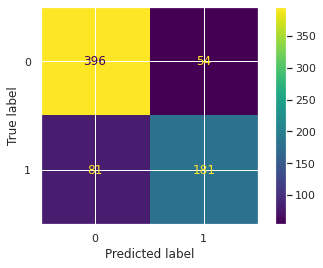

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rl.classes_)
disp.plot()
plt.show()

Y ahora comprobamos cómo se comporta el modelo con los datos de test o prueba 

In [ ]:
predictions_rl = rl.predict(X_test)
print(classification_report(y_test, predictions_rl))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.82      0.70      0.76        80

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179





```
# Tiene formato de código
```

Conseguimos un 80% de precisión, nada mal. Veamos la matriz de confusión

In [ ]:
confusion_matrix(y_test, predictions_rl)

array([[87, 12],
       [24, 56]])

Podemos visualizar la matriz de confusión para interpretar más fácilmente los datos

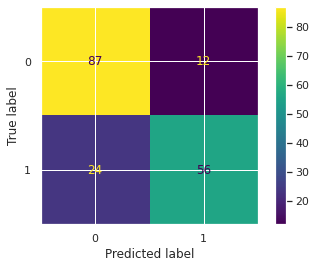

In [ ]:
cm = confusion_matrix(y_test, predictions_rl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Verdadero positivo: 88 (predijimos un resultado positivo y fue positivo)

Verdadero negativo: 55 (predijimos un resultado negativo y fue negativo)

Falso positivo: 11 (Predijimos un resultado positivo y fue negativo)

Falso negativo: 25 (Predijimos un resultado negativo y fue positivo)

##Modelo de K Nearest Neighbours (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predictions_knn = knn.predict(X_test)
print(knn.score(X_train, y_train))

0.8328651685393258


In [ ]:
print(knn.score(X_test, y_test))

0.6815642458100558


In [ ]:
predictions_knn = knn.predict(X_test)
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        99
           1       0.71      0.49      0.58        80

    accuracy                           0.68       179
   macro avg       0.69      0.66      0.66       179
weighted avg       0.69      0.68      0.67       179



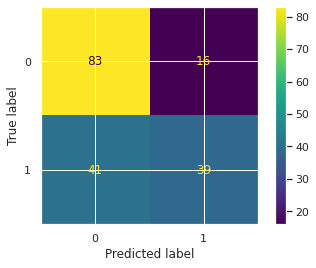

In [ ]:
cm = confusion_matrix(y_test, predictions_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##Modelo de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print(rf.score(X_train, y_train))

0.9859550561797753


In [ ]:
print(rf.score(X_test, y_test))

0.7988826815642458


Podemos visualizar la importancia de cada variable o característica del pasajero

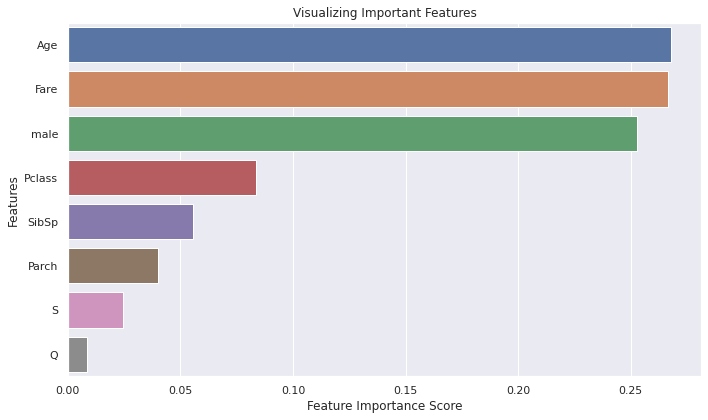

In [ ]:
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

Comprobamos el resultado del modelo en el conjunto de datos de prueba o test

In [ ]:
predictions_rf = rf.predict(X_test)
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.81      0.72      0.76        80

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



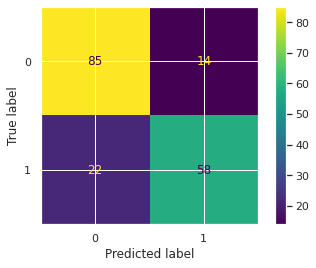

In [ ]:
cm = confusion_matrix(y_test, predictions_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##Modelo de SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
predictions_svc = svc.predict(X_test)
print(svc.score(X_train, y_train))

0.6811797752808989


In [ ]:
print(svc.score(X_test, y_test))

0.664804469273743


In [ ]:
predictions_svc = rf.predict(X_test)
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.81      0.72      0.76        80

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



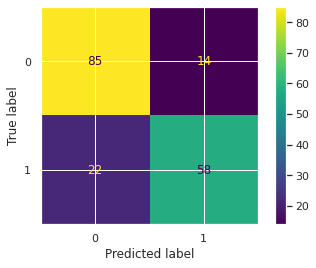

In [ ]:
cm = confusion_matrix(y_test, predictions_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##Ejercicio
Añadir una columna a los datos que calcule la longitud del nombre del pasajero y comprobar si mejora la precisión de los modelos

In [ ]:
train_data = pd.read_csv("sample_data/train.csv")
train_data['Longitud_nombre']=train_data['Name'].apply(len) #Longitud del nombre
#train_data['Longitud_nombre']=train_data['Name'].apply(lambda x: len(x.split(" ")))   #Número de palabras que componen el nombre
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Longitud_nombre
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24


In [ ]:
train_data['Age']=train_data['Age'].fillna(edad_media)

In [ ]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [ ]:
del train_data['Cabin']

In [ ]:
genero = pd.get_dummies(train_data["Sex"],drop_first=True)

In [ ]:
puerto = pd.get_dummies(train_data["Embarked"],drop_first=True)

In [ ]:
train_data = pd.concat([train_data,genero,puerto],axis=1)

In [ ]:
train_data.drop(["PassengerId","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [ ]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Longitud_nombre,male,Q,S
0,0,3,22.0,1,0,7.2500,23,1,0,1
1,1,1,38.0,1,0,71.2833,51,0,0,0
2,1,3,26.0,0,0,7.9250,22,0,0,1
3,1,1,35.0,1,0,53.1000,44,0,0,1
4,0,3,35.0,0,0,8.0500,24,1,0,1


In [ ]:
X = train_data.drop("Survived",axis=1)
y = train_data["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
rl.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print(rl.score(X_train, y_train))

0.8146067415730337


In [ ]:
print(rl.score(X_test, y_test))

0.8044692737430168


In [ ]:
y_pred = rl.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       450
           1       0.78      0.69      0.73       262

    accuracy                           0.81       712
   macro avg       0.81      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[399,  51],
       [ 81, 181]])

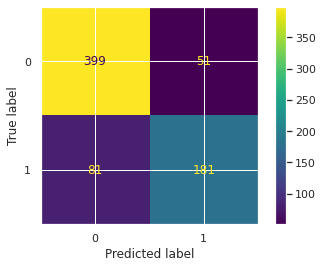

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rl.classes_)
disp.plot()
plt.show()

In [ ]:
predictions_rl = rl.predict(X_test)
print(classification_report(y_test, predictions_rl))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.84      0.70      0.76        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



In [ ]:
confusion_matrix(y_test, predictions_rl)

array([[88, 11],
       [24, 56]])

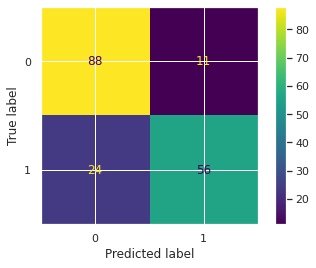

In [ ]:
cm = confusion_matrix(y_test, predictions_rl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()